## Predicción para detectar mensajes de Correo Spam con Machine Learning


---
**Inteligencia Computacional**

* Presentado a: Ing. Ruelas Acero Donia Alizandra 
* Presentado por: Contrreras Chuquitarqui Milagros Medalit
* VIII Semestre
* 2023



In [6]:
#Importando librerias y el dataset
import numpy as np
import pandas as pd
import seaborn as sns


## Importando datos

In [7]:
#cargando y leyendo el dataframe
datos = pd.read_csv('emails.csv')
#mostramos las 8 primeras filas del dataframe
#1= spam
#0= mensaje normal
datos.head(8)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [9]:
datos.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


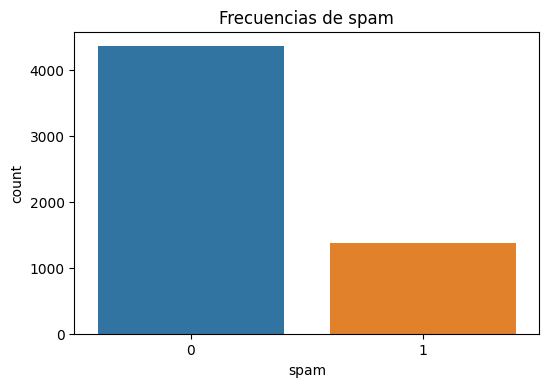

In [10]:
#VIsualizar las frecuencias de spam
import matplotlib.pyplot as plt
plt.figure(dpi=100)
sns.countplot(datos['spam'])
plt.title("Frecuencias de spam")
plt.show()

## Preparando los datos

In [11]:
#********
import nltk #bibliotecas para procesamiento de lenguaje natural osea palabras
#descargar el paquete stopwords
nltk.download('stopwords') #palabras vacias, al eliminarlos no afectara el mensaje del correo en si

#nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords
import string

In [13]:
datos.shape

(5728, 2)

In [14]:
#Revisar los datos duplicados y eliminarlos
datos.drop_duplicates(inplace=True)

In [15]:
datos.shape
#ver cuantas filas y columnas hay en el dataframe

(5695, 2)

In [16]:
#revisar si hay datos vacios por columna
datos.isnull().sum()

text    0
spam    0
dtype: int64

In [17]:
#definir el metodo para procesar el texto
def process_text(text):
  #remover los signos de puntuacion del texto
  napunc=[char for char in text if char not in string.punctuation]
  napunc= ''.join(napunc)

  #se remueven las palabras vacias
  clean_words = [word for word in napunc.split() if word.lower() not in stopwords.words('english')]

  #se retorna el texto sin palabras vacias y sin signos de puntuacion
  return clean_words

In [18]:
datos['text'].head().apply(process_text) #mostrar por stiquetas, los correos procesados

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
3    [Subject, 4, color, printing, special, request...
4    [Subject, money, get, software, cds, software,...
Name: text, dtype: object

In [19]:
message4 = 'holi holu hola holi holu holi hola'
message5 = 'prueba prueba prueba prueba'
from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer=process_text).fit_transform([[message4],[message5]])
print(bow4)
print(bow4.shape)

  (0, 1)	3
  (0, 2)	2
  (0, 0)	2
  (1, 3)	4
(2, 4)


In [20]:
#Convertir el texto en una matriz de tokens
from sklearn.feature_extraction.text import CountVectorizer
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(datos['text'])

In [21]:
messages_bow.shape

(5695, 37229)

In [22]:
#80 - 20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(messages_bow, datos['spam'], test_size=0.20, random_state=0)

## MLPClassifier

In [23]:
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(hidden_layer_sizes = (10,10), activation = 'tanh',learning_rate = 'adaptive', max_iter = 1000)

In [24]:
classificador.fit(X_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 10),
              learning_rate='adaptive', max_iter=1000)

In [25]:
print(classificador.predict(X_train))
print(y_train)

[0 0 0 ... 0 0 0]
3337    0
2104    0
3905    0
461     1
314     1
       ..
4950    0
3273    0
1653    0
2611    0
2736    0
Name: spam, Length: 4556, dtype: int64


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediccion = classificador.predict(X_train)
print(classification_report(y_train, prediccion))
print()
print('Matriz de confusion: \n', confusion_matrix(y_train, prediccion))
print()
print('Precision: ', accuracy_score(y_train, prediccion))
#[[3457   0]  falsos positivos
# [  0 1099]]  falsos negativos

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       1.00      1.00      1.00      1099

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Matriz de confusion: 
 [[3457    0]
 [   0 1099]]

Precision:  1.0


In [27]:
print(classificador.predict(X_test))
print(y_test)

[1 0 0 ... 0 0 0]
977     1
3275    0
4163    0
751     1
3244    0
       ..
4506    0
1050    1
3366    0
2191    0
3911    0
Name: spam, Length: 1139, dtype: int64


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediccion = classificador.predict(X_test)
print(classification_report(y_test, prediccion))
print()
print('Matriz de confusion: \n', confusion_matrix(y_test, prediccion))
print()
print('Precision: ', accuracy_score(y_test, prediccion))
#[[868   1]  falsos positivos
# [  15 257]]  falsos negativos

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       870
           1       0.99      0.95      0.97       269

    accuracy                           0.99      1139
   macro avg       0.99      0.97      0.98      1139
weighted avg       0.99      0.99      0.98      1139


Matriz de confusion: 
 [[867   3]
 [ 14 255]]

Precision:  0.9850746268656716


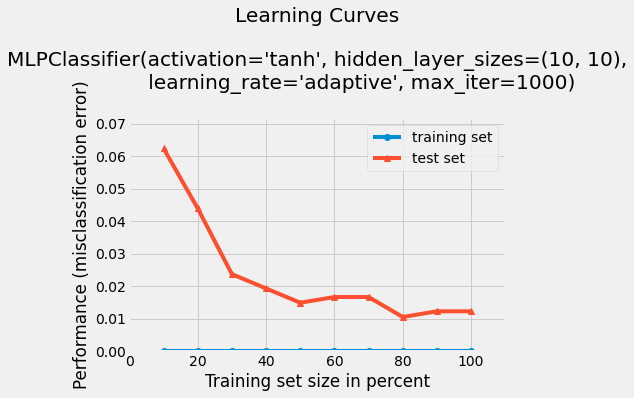

In [29]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
import numpy as np

plot_learning_curves(X_train, y_train, X_test, y_test, classificador)
plt.show()


## Naive Bayes

In [30]:
#Aplicacion con la clasificacion de Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classificador2 = MultinomialNB().fit(X_train, y_train)


In [31]:
#se muestra la prediccion y los valores actuales con los datos de entrenamineto
print(classificador2.predict(X_train))
print(y_train)

[0 0 0 ... 0 0 0]
3337    0
2104    0
3905    0
461     1
314     1
       ..
4950    0
3273    0
1653    0
2611    0
2736    0
Name: spam, Length: 4556, dtype: int64


In [32]:
#Evaluar el modelo con los datos de entrenamiento
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#mostrar los datos de precision
prediccion2 = classificador2.predict(X_train)
print(classification_report(y_train, prediccion2))
print()
print('Matriz de confusion: \n', confusion_matrix(y_train, prediccion2))
print()
print('Precision: ', accuracy_score(y_train, prediccion2))
#[[3445   12]  falsos positivos
# [   1 1098]]  falsos negativos

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Matriz de confusion: 
 [[3445   12]
 [   1 1098]]

Precision:  0.9971466198419666


In [33]:
#con los datos de prueba
print(classificador2.predict(X_test))
print(y_test)

[1 0 0 ... 0 0 0]
977     1
3275    0
4163    0
751     1
3244    0
       ..
4506    0
1050    1
3366    0
2191    0
3911    0
Name: spam, Length: 1139, dtype: int64


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediccion2 = classificador2.predict(X_test)
print(classification_report(y_test, prediccion2))
print()
print('Matriz de confusion: \n', confusion_matrix(y_test, prediccion2))
print()
print('Precision: ', accuracy_score(y_test, prediccion2))
#[[862   8] 12 de 3445 falsos positivos
# [ 1  268]] 1 de 1098 falsos negativos

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139


Matriz de confusion: 
 [[862   8]
 [  1 268]]

Precision:  0.9920983318700615


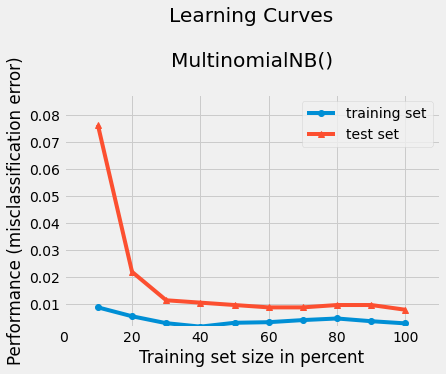

In [35]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
import numpy as np

plot_learning_curves(X_train, y_train, X_test, y_test, classificador2)
plt.show()
#La pendiente indica que si tuviéramos un conjunto de entrenamiento más grande, el error del conjunto de prueba podría disminuir aún más.

## Regresión Logistica

In [41]:
from sklearn.linear_model import LogisticRegression


#classificador3 = LogisticRegression(solver='liblinear', penalty='l1')
classificador3 = LogisticRegression(max_iter = 2000, verbose = 1, tol = 1e-6)
classificador3.fit(X_train, y_train)

print(classificador3.predict(X_train))
print(y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0 0 0 ... 0 0 0]
3337    0
2104    0
3905    0
461     1
314     1
       ..
4950    0
3273    0
1653    0
2611    0
2736    0
Name: spam, Length: 4556, dtype: int64


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s finished


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediccion3 = classificador3.predict(X_train)
print(classification_report(y_train, prediccion3))
print()
print('Matriz de confusion: \n', confusion_matrix(y_train, prediccion3))
print()
print('Precision: ', accuracy_score(y_train, prediccion3))
#[[3453   4]  falsos positivos
# [  1 1098]]  falsos negativos

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       1.00      1.00      1.00      1099

    accuracy                           1.00      4556
   macro avg       1.00      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556


Matriz de confusion: 
 [[3457    0]
 [   0 1099]]

Precision:  1.0


In [43]:
print(classificador3.predict(X_test))
print(y_test)

[1 0 0 ... 0 0 0]
977     1
3275    0
4163    0
751     1
3244    0
       ..
4506    0
1050    1
3366    0
2191    0
3911    0
Name: spam, Length: 1139, dtype: int64


In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
prediccion3 = classificador3.predict(X_test)
print(classification_report(y_test, prediccion3))
print()
print('Matriz de confusion: \n', confusion_matrix(y_test, prediccion3))
print()
print('Precision: ', accuracy_score(y_test, prediccion3))
#[[864   6]  falsos positivos
# [  12 257]]  falsos negativos

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       870
           1       0.98      0.96      0.97       269

    accuracy                           0.99      1139
   macro avg       0.98      0.98      0.98      1139
weighted avg       0.99      0.99      0.99      1139


Matriz de confusion: 
 [[864   6]
 [ 10 259]]

Precision:  0.9859525899912204


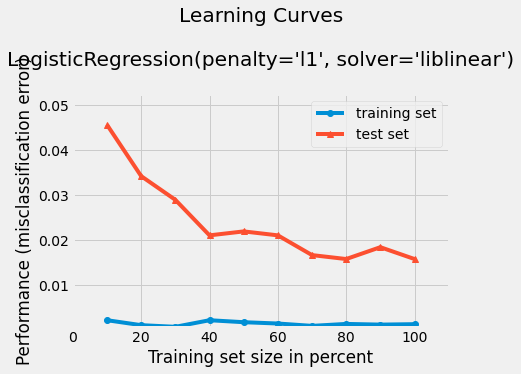

In [40]:

from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
import numpy as np

plot_learning_curves(X_train, y_train, X_test, y_test, classificador3)
plt.show()
#La pendiente indica que si tuviéramos un conjunto de entrenamiento más grande, el error del conjunto de prueba podría disminuir aún más.